### Limpieza de datos.

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os
from scipy import stats
import statsmodels.api as sm

In [2]:
os.getcwd()

'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc\\scripts'

In [3]:
ruta = 'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'
print(os.getcwd())

#'/Users/macbookair/Documents/GitHub/predicting_poverty_bdmc'
#'c:\\Users\\ps.escobar\\OneDrive - Universidad de los andes\\Documentos\\GitHub\\predicting_poverty_bdmc'

c:\Users\ps.escobar\OneDrive - Universidad de los andes\Documentos\GitHub\predicting_poverty_bdmc\scripts


1. tr_p = pd.read_csv(ruta+'\\stores\\train_personas.csv')
2. ts_p = pd.read_csv(ruta+'\\stores\\test_personas.csv')
3. ts_h = pd.read_csv(ruta+'\\stores\\test_hogares.csv')
4. tr_h = pd.read_csv(ruta+'\\stores\\train_hogares.csv')

In [4]:
#Amrimos las bases de datos

tr_p = pd.read_csv(ruta+'\\stores\\train_personas.csv')
ts_p = pd.read_csv(ruta+'\\stores\\test_personas.csv')
tr_h = pd.read_csv(ruta+'\\stores\\train_hogares.csv')
ts_h = pd.read_csv(ruta+'\\stores\\test_hogares.csv')

In [5]:
#Crear variables para luego unir bases
tr_p['sample'] = 'train'
tr_h['sample'] = 'train'
ts_p['sample'] = 'test'
ts_h['sample'] = 'test'

In [6]:
#train personas
trp_l = tr_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

#test personas
tsp_l = ts_p.rename(columns = {
    'P6020': 'sexo',
    'P6040': 'edad',
    'P6090': 'afil_salud',
    'P6100': 'reg_salud',
    'P6210': 'nivel_edu',
    'P6210s1': 'anos_edu',
    'P6240': 'semana_oficio',
    'P6430': 'posi_lab',
    'P6510': 'h_extra',
    'P6545': 'prima',
    'P6580': 'bonos',
    'P6585s1': 'a_alim',
    'P6585s2': 'a_trans',
    'P6585s3': 'a_fam',
    'P6585s4': 'a_edu',
    'P6590': 'sal_alim',
    'P6600': 'sal_viv',
    'P6620': 'sal_especie',
    'P6630s1': 'prima_serv',
    'P6630s2': 'prima_nav',
    'P6630s3': 'prima_vac',
    'P6630s4': 'viaticos',
    'P6630s6': 'bon_anual',
    'P6800': 'h_tra_prin',
    'P6920': 'afil_pension',
    'P7045': 'h_tra_2',
    'P7495': 'arriendo',
    'P7500s2': 'pension',
    'P7500s3': 'pat_pension',
    'P7510s2': 'hog_int',
    'P7510s3': 'ayuda_gov',
    'P7510s5': 'rent_inv',
    'P7510s6': 'rent_cesantias',
    'P7510s7': 'otras_fuentes',
    'P7422': 'ing_desempleo',
    'Ingtot' : 'ingtot'
})

In [7]:
#Nos quedamos con algunas variables para cada base

trp_l = trp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud', 
               'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab', 'h_extra', 
               'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu', 'sal_alim',
                'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav', 'prima_vac', 
                'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension', 'h_tra_2', 
                'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov', 'rent_inv', 
                'rent_cesantias', 'otras_fuentes', 'ing_desempleo', 'sample', 'ingtot']]

In [8]:
#Nos quedamos con algunas variables para cada base

tsp_l = tsp_l[['id', 'Orden', 'Clase', 'Dominio', 'sexo', 'edad', 'afil_salud',
                'reg_salud', 'nivel_edu', 'anos_edu', 'semana_oficio', 'posi_lab',
                'h_extra', 'prima', 'bonos', 'a_alim', 'a_trans', 'a_fam', 'a_edu',
                'sal_alim', 'sal_viv', 'sal_especie', 'prima_serv', 'prima_nav',
                'prima_vac', 'viaticos', 'bon_anual', 'h_tra_prin', 'afil_pension',
                'h_tra_2', 'arriendo', 'pension', 'pat_pension', 'hog_int', 'ayuda_gov',
                'rent_inv', 'rent_cesantias', 'otras_fuentes', 'ing_desempleo', 'sample']]

In [9]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 41)
(219644, 40)


In [10]:
tsp_l['ingtot'] = None
tsp_l.head()

,id,Orden,Clase,Dominio,sexo,edad,afil_salud,reg_salud,nivel_edu,anos_edu,...,pension,pat_pension,hog_int,ayuda_gov,rent_inv,rent_cesantias,otras_fuentes,ing_desempleo,sample,ingtot
0,3279230a4917cdf883df34cd,1,1,MEDELLIN,1,33,1.0,1.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
1,3279230a4917cdf883df34cd,3,1,MEDELLIN,2,7,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
2,3279230a4917cdf883df34cd,2,1,MEDELLIN,2,37,1.0,1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
3,3279230a4917cdf883df34cd,4,1,MEDELLIN,1,5,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test,None
4,01bd1f72445acc719d19bd25,1,1,MEDELLIN,1,27,1.0,1.0,5.0,11.0,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,test,None


In [11]:
print(trp_l.shape)
print(tsp_l.shape)

(543109, 41)
(219644, 41)


In [12]:
#Unir las bases de datos
data_p = pd.concat([trp_l, tsp_l], ignore_index = True)

In [13]:
data_p.shape

(762753, 41)

In [14]:
data_p.head()

,id,Orden,Clase,Dominio,sexo,edad,afil_salud,reg_salud,nivel_edu,anos_edu,...,pension,pat_pension,hog_int,ayuda_gov,rent_inv,rent_cesantias,otras_fuentes,ing_desempleo,sample,ingtot
0,8d0193e328305a042001a35f,2,1,MEDELLIN,2,38,1.0,1.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,1.109190e+06
1,8d0193e328305a042001a35f,5,1,MEDELLIN,1,3,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN
2,8d0193e328305a042001a35f,1,1,MEDELLIN,1,41,1.0,1.0,5.0,11.0,...,NaN,NaN,2.0,2.0,2.0,1.0,2.0,NaN,train,1.399140e+06
3,8d0193e328305a042001a35f,4,1,MEDELLIN,1,3,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN
4,8d0193e328305a042001a35f,3,1,MEDELLIN,1,11,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN


In [15]:
print(data_p.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762753 entries, 0 to 762752
Data columns (total 41 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              762753 non-null  object 
 1   Orden           762753 non-null  int64  
 2   Clase           762753 non-null  int64  
 3   Dominio         762753 non-null  object 
 4   sexo            762753 non-null  int64  
 5   edad            762753 non-null  int64  
 6   afil_salud      628486 non-null  float64
 7   reg_salud       586224 non-null  float64
 8   nivel_edu       730826 non-null  float64
 9   anos_edu        628486 non-null  float64
 10  semana_oficio   628486 non-null  float64
 11  posi_lab        348015 non-null  float64
 12  h_extra         161340 non-null  float64
 13  prima           161340 non-null  float64
 14  bonos           161340 non-null  float64
 15  a_alim          161340 non-null  float64
 16  a_trans         161340 non-null  float64
 17  a_fam     

<Axes: >

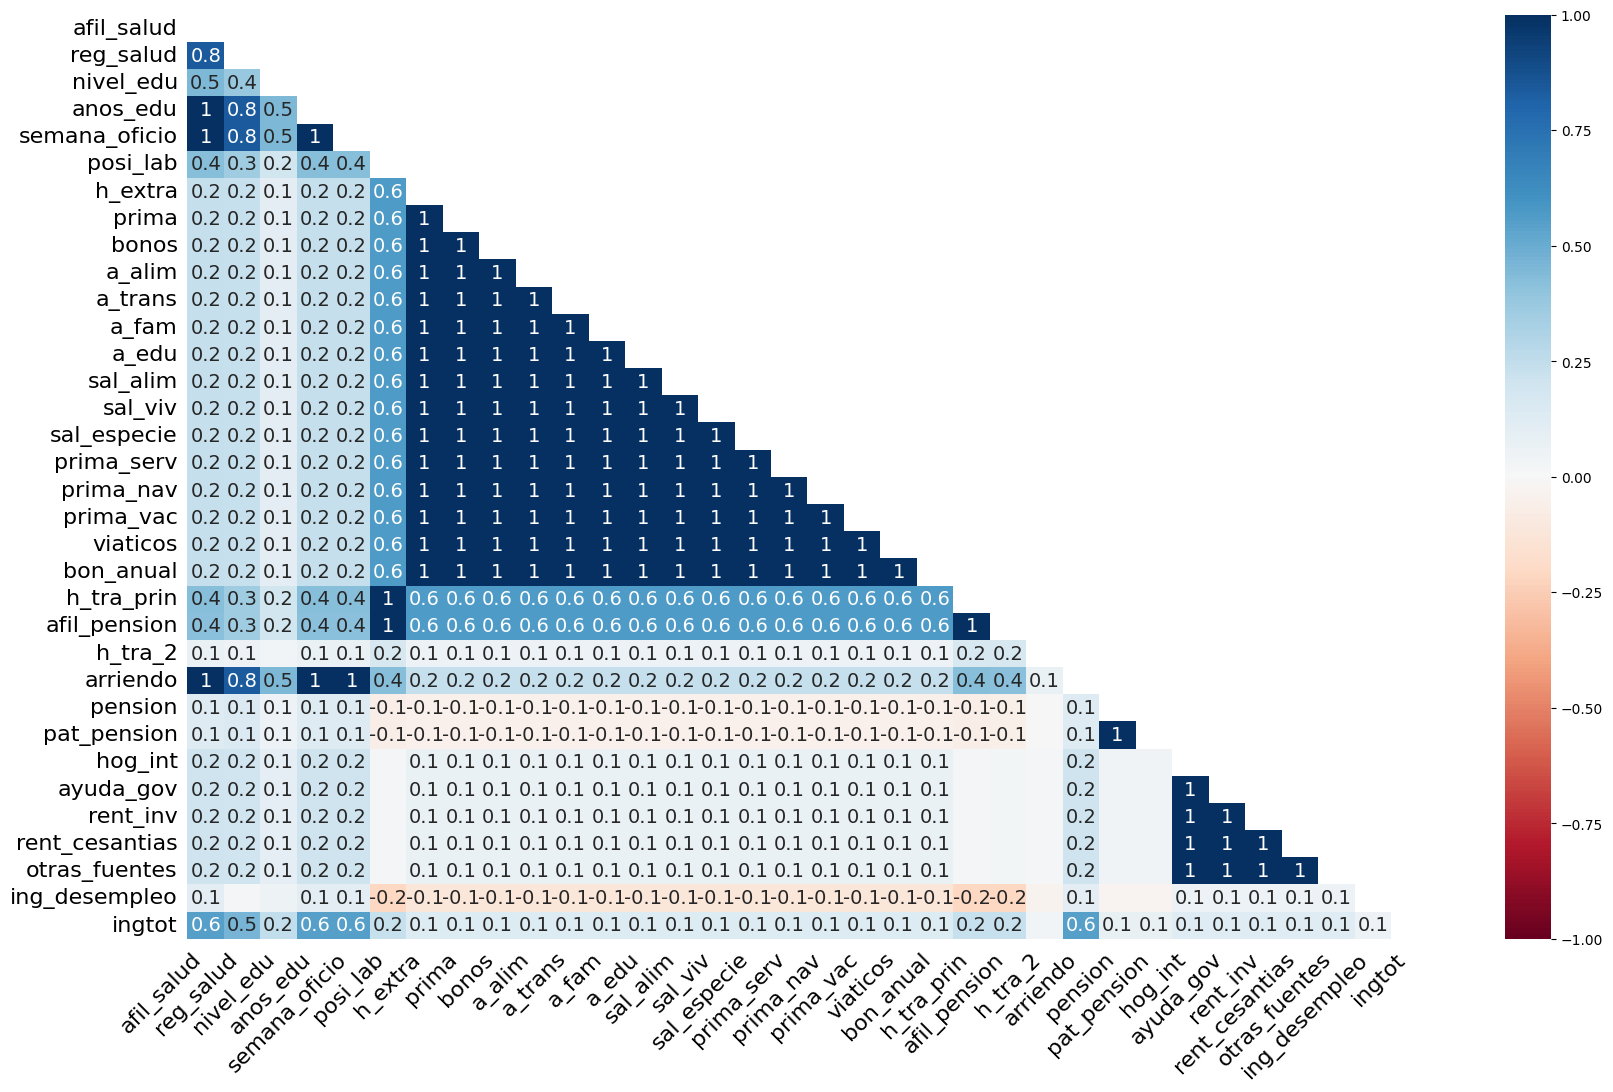

In [16]:
msno.heatmap(data_p)
#Las correlaciones entre valores nulos son las esperadas

<Axes: >

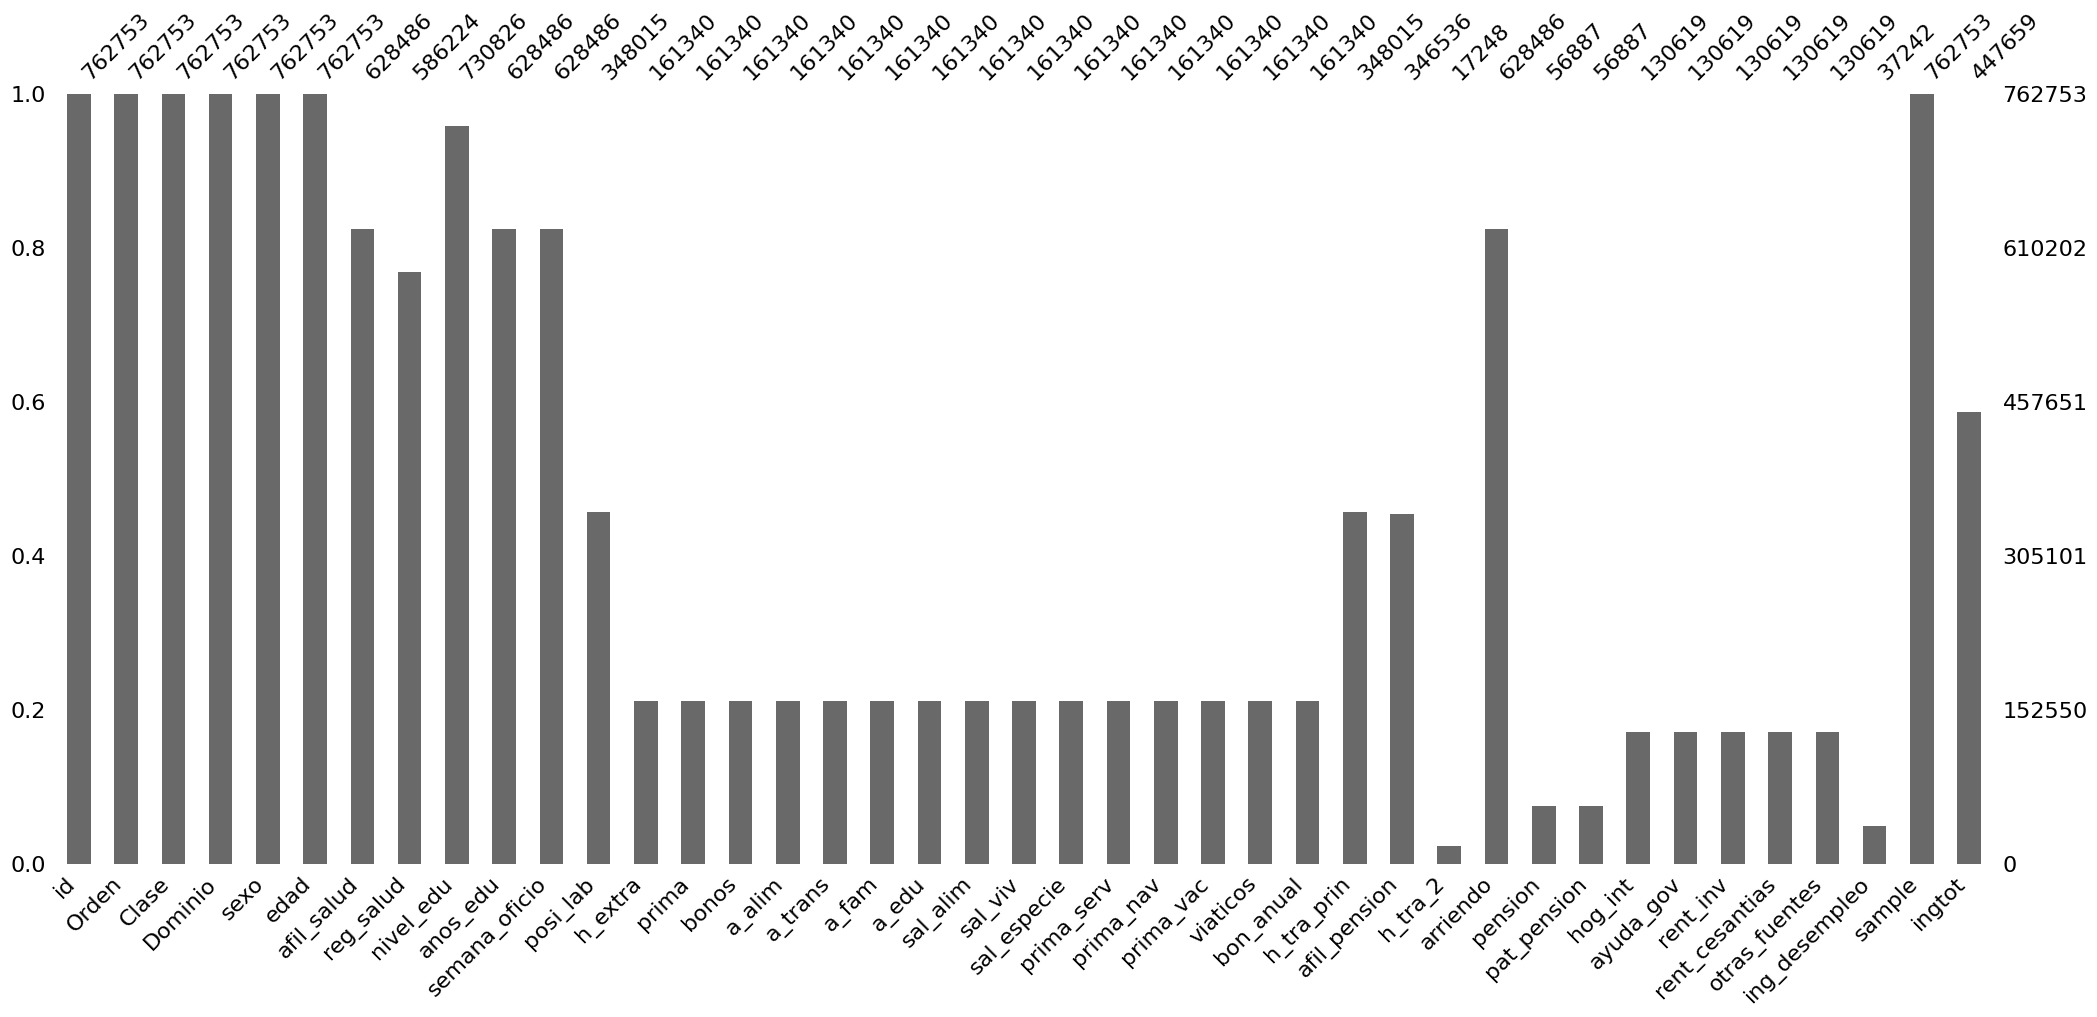

In [17]:
msno.bar(data_p)

Vamos a suponer:
1. los missing en afiliación a salud son personas "no saben no responden"
2. los missing en regimenes de salud son personas "no saben no responden"
3. los missing de arriendo son ingresos por este concepto igual a 0
4. los missing en afiliación pensión son personas no cotisantes

In [18]:
print(data_p['afil_salud'].unique())
print(data_p['reg_salud'].unique())
print(data_p['arriendo'].unique())
print(data_p['afil_pension'].unique())

[ 1. nan  2.  9.]
[ 1. nan  3.  2.  9.]
[ 2. nan  1.]
[ 1. nan  2.  3.]


In [19]:
data_p['afil_salud'] = data_p['afil_salud'].replace([np.nan], 9)
data_p['reg_salud'] = data_p['reg_salud'].replace([np.nan], 9)
data_p['arriendo'] = data_p['arriendo'].replace([np.nan], 2)
data_p['afil_pension'] = data_p['afil_pension'].replace([np.nan], 2)

In [20]:
print(data_p['afil_salud'].unique())
print(data_p['reg_salud'].unique())
print(data_p['arriendo'].unique())
print(data_p['afil_pension'].unique())

[1. 9. 2.]
[1. 9. 3. 2.]
[2. 1.]
[1. 2. 3.]


count    628486.000000
mean          6.168938
std           3.809229
min           0.000000
25%           3.000000
50%           5.000000
75%          10.000000
max          99.000000
Name: anos_edu, dtype: float64
count    762753.000000
mean         33.538653
std          21.662202
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         110.000000
Name: edad, dtype: float64


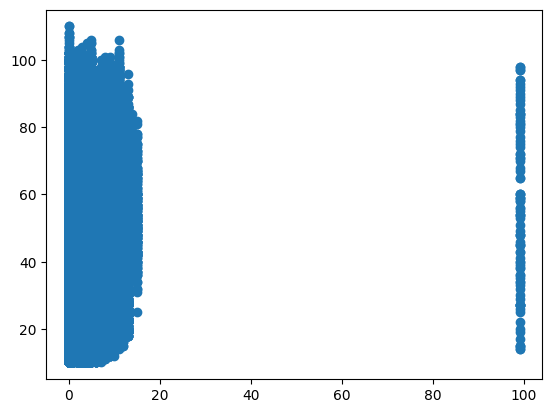

In [21]:
print(data_p['anos_edu'].describe())
print(data_p['edad'].describe())
X = data_p['anos_edu']
Y = data_p['edad']
fig, ax =plt.subplots()
ax.scatter(X, Y)

Se identifican valores atipicos en las variables de edad y años de educación que serán remplazados por la moda de las variables

count    762753.000000
mean          7.008617
std           3.783047
min           0.000000
25%           4.000000
50%           7.000000
75%          11.000000
max          15.000000
Name: anos_edu, dtype: float64
count    762753.000000
mean         33.531222
std          21.652110
min           0.000000
25%          16.000000
50%          31.000000
75%          50.000000
max         100.000000
Name: edad, dtype: float64


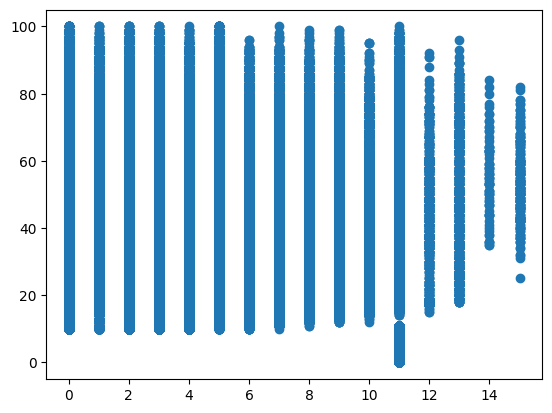

In [22]:
data_p['anos_edu'] = data_p['anos_edu'].where(data_p['anos_edu'] <= 30, data_p['anos_edu'].mode()[0])
data_p['edad'] = data_p['edad'].where(data_p['edad'] <= 100, data_p['edad'].mode()[0])

print(data_p['anos_edu'].describe())
print(data_p['edad'].describe())
X = data_p['anos_edu']
Y = data_p['edad']
fig, ax =plt.subplots()
ax.scatter(X, Y)

La variable nivel_edu y anos_edu tienen difieren entre ellas en terminos de cantidad de missing values. Intentaremos extraer información de anos_edu para reemplazar algunos datos faltantes en la variable nivel_edu

In [23]:
#equivalencias entre nivel_edu y anos_edu
equivalencias = {0: 1, 3: 2, 8: 3, 12: 4, 14: 5, 19: 6, 0: 9}

#mascara booleana para identificar los valores nulos en nivel_edu
mask_missing_nivel_edu = data_p['nivel_edu'].isnull()

valores_faltantes_reemplazados = 0

for index, row in data_p[mask_missing_nivel_edu].iterrows():
    anos_edu_valor = row['anos_edu']
    
    if not pd.isnull(anos_edu_valor):
        #si no encontramos valor reemplazamos con 9 que es "no sabe-noresponde"
        data_p.at[index, 'nivel_edu'] = equivalencias.get(anos_edu_valor, 9)
        valores_faltantes_reemplazados += 1

#cantidad de remplazos
print(f'Número de valores faltantes en nivel_edu reemplazados: {valores_faltantes_reemplazados}')

Número de valores faltantes en nivel_edu reemplazados: 31927


Muchas de las variables con valores faltantes pueden ser convertidas en dummy debido a la naturaleza con la que se consturyó la encuesta. Por ejemplo:
1. h_extra: es una varable categoríca que señala si las personas reciben ingresos por horas extra o no y tiene una categoría "no sabe-no responde". Por lo que transformarla en una dummy con 1 para quienes reciben ingresos de horas extra y 0. Esto puede aplicarse para otras variables

In [24]:
data_p = data_p.assign(h_extra = np.where((data_p['h_extra'].isna()) | (data_p['h_extra'] == 9) | (data_p['h_extra'] == 2), 0, data_p['h_extra']),
                        prima = np.where((data_p['prima'].isna()) | (data_p['prima'] == 9) | (data_p['prima'] == 2), 0, data_p['prima']),
                        bonos = np.where((data_p['bonos'].isna()) | (data_p['bonos'] == 9) | (data_p['bonos'] == 2), 0, data_p['bonos']),
                        a_alim = np.where((data_p['a_alim'].isna()) | (data_p['a_alim'] == 9) | (data_p['a_alim'] == 2), 0, data_p['a_alim']),
                        a_trans = np.where((data_p['a_trans'].isna()) | (data_p['a_trans'] == 9) | (data_p['a_trans'] == 2), 0, data_p['a_trans']),
                        a_fam = np.where((data_p['a_fam'].isna()) | (data_p['a_fam'] == 9) | (data_p['a_fam'] == 2), 0, data_p['a_fam']),
                        a_edu = np.where((data_p['a_edu'].isna()) | (data_p['a_edu'] == 9) | (data_p['a_edu'] == 2), 0, data_p['a_edu']),
                        sal_alim = np.where((data_p['sal_alim'].isna()) | (data_p['sal_alim'] == 9) | (data_p['sal_alim'] == 2), 0, data_p['sal_alim']),
                        sal_viv = np.where((data_p['sal_viv'].isna()) | (data_p['sal_viv'] == 9) | (data_p['sal_viv'] == 2), 0, data_p['sal_viv']),
                        sal_especie = np.where((data_p['sal_especie'].isna()) | (data_p['sal_especie'] == 9) | (data_p['sal_especie'] == 2), 0, data_p['sal_especie']),
                        prima_serv = np.where((data_p['prima_serv'].isna()) | (data_p['prima_serv'] == 9) | (data_p['prima_serv'] == 2), 0, data_p['prima_serv']),
                        prima_nav = np.where((data_p['prima_nav'].isna()) | (data_p['prima_nav'] == 9) | (data_p['prima_nav'] == 2), 0, data_p['prima_nav']),
                        prima_vac = np.where((data_p['prima_vac'].isna()) | (data_p['prima_vac'] == 9) | (data_p['prima_vac'] == 2), 0, data_p['prima_vac']),
                        viaticos = np.where((data_p['viaticos'].isna()) | (data_p['viaticos'] == 9) | (data_p['viaticos'] == 2), 0, data_p['viaticos']),
                        bon_anual = np.where((data_p['bon_anual'].isna()) | (data_p['bon_anual'] == 9) | (data_p['bon_anual'] == 2), 0, data_p['bon_anual']),
                        h_tra_2 = np.where((data_p['h_tra_2'].isna()) | (data_p['h_tra_2'] == 98) | (data_p['h_tra_2'] == 99), 0, data_p['h_tra_2']),
                        pension = np.where((data_p['pension'].isna()) | (data_p['pension'] == 9) | (data_p['pension'] == 2), 0, data_p['pension']),
                        pat_pension = np.where((data_p['pat_pension'].isna()) | (data_p['pat_pension'] == 9) | (data_p['pat_pension'] == 2), 0, data_p['pat_pension']),
                        hog_int = np.where((data_p['hog_int'].isna()) | (data_p['hog_int'] == 9) | (data_p['hog_int'] == 2), 0, data_p['hog_int']),
                        ayuda_gov = np.where((data_p['ayuda_gov'].isna()) | (data_p['ayuda_gov'] == 9) | (data_p['ayuda_gov'] == 2), 0, data_p['ayuda_gov']),
                        rent_inv = np.where((data_p['rent_inv'].isna()) | (data_p['rent_inv'] == 9) | (data_p['rent_inv'] == 2), 0, data_p['rent_inv']),
                        rent_cesantias = np.where((data_p['rent_cesantias'].isna()) | (data_p['rent_cesantias'] == 9) | (data_p['rent_cesantias'] == 2), 0, data_p['rent_cesantias']),
                        otras_fuentes = np.where((data_p['otras_fuentes'].isna()) | (data_p['otras_fuentes'] == 9) | (data_p['otras_fuentes'] == 2), 0, data_p['otras_fuentes']),
                        posi_lab = np.where(data_p['posi_lab'].isna(), 9, data_p['posi_lab']),
                        semana_oficio = np.where(data_p['semana_oficio'].isna(), 9, data_p['semana_oficio']),
                        ing_desempleo = np.where((data_p['ing_desempleo'].isna()) | (data_p['ing_desempleo'] == 9) | (data_p['ing_desempleo'] == 2), 0, data_p['ing_desempleo']))

(array([1.34920e+04, 3.31840e+04, 2.84630e+04, 2.00331e+05, 4.47600e+04,
        1.87090e+04, 7.28800e+03, 1.03700e+03, 6.33000e+02, 1.18000e+02]),
 array([  1. ,  13.9,  26.8,  39.7,  52.6,  65.5,  78.4,  91.3, 104.2,
        117.1, 130. ]),
 <BarContainer object of 10 artists>)

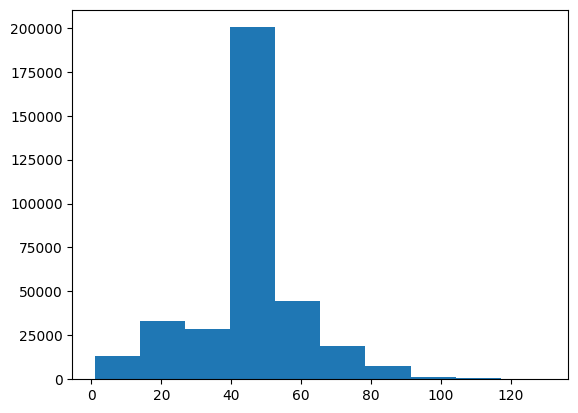

In [25]:
fig, ax = plt.subplots()
ax.hist(data_p['h_tra_prin'])

In [26]:
moda_h_tra_prin = data_p['h_tra_prin'].mode()[0]
media_h_tra_prin = data_p['h_tra_prin'].mean()
std_dev_h_tra_prin = data_p['h_tra_prin'].std()

semilla = 123
np.random.seed(semilla)

indices_nulos = data_p['h_tra_prin'].index[data_p['h_tra_prin'].isnull()]
decisiones_aleatorias = np.random.choice([-1, 0, 1], size=len(indices_nulos))

data_p['h_tra_prin_moda'] = data_p['h_tra_prin'].copy()
data_p['h_tra_prin_media'] = data_p['h_tra_prin'].copy()

data_p.loc[indices_nulos, 'h_tra_prin_moda'] = moda_h_tra_prin + decisiones_aleatorias * std_dev_h_tra_prin
data_p.loc[indices_nulos, 'h_tra_prin_media'] = media_h_tra_prin + decisiones_aleatorias * std_dev_h_tra_prin

In [27]:
moda_ingot = data_p['ingtot'].mode()[0]
media_ingot = data_p['ingot'].mean()
std_dev_ingot = data_p['ingtot'].std()

semilla = 123
np.random.seed(semilla)

indices_nulos = data_p['ingtot'].index[data_p['ingtot'].isnull()]
decisiones_aleatorias_ingot = np.random.normal(loc = 0, scale = 1, size = len(indices_nulos))

data_p['ingot_moda'] = data_p['ingot'].copy()
data_p['ingot_media'] = data_p['ingot'].copy()

data_p.loc[indices_nulos, 'ingot_moda'] = moda_ingot + decisiones_aleatorias_ingot * std_dev_ingot
data_p.loc[indices_nulos, 'ingot_media'] = media_ingot + decisiones_aleatorias_ingot * std_dev_ingot

<Axes: >

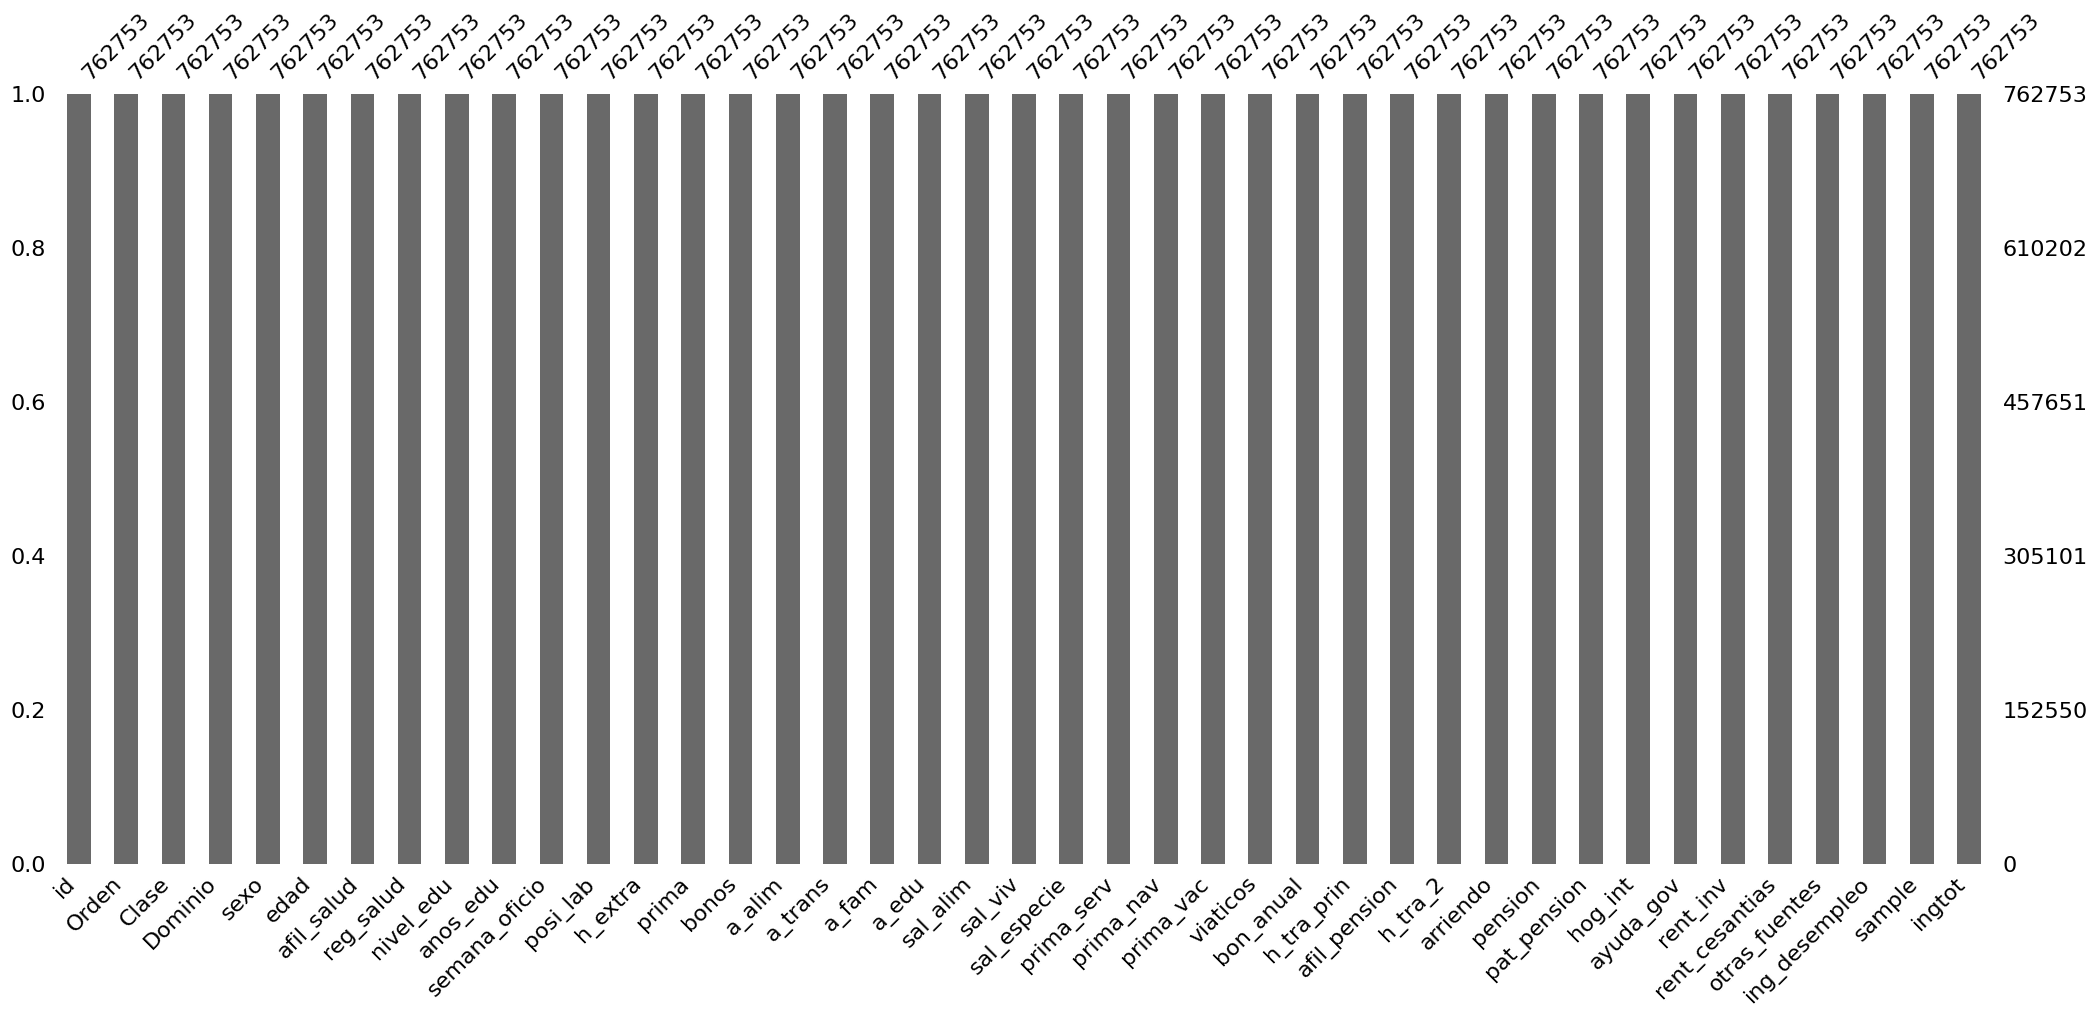

In [28]:
msno.bar(data_p)

In [29]:
#Vamos a dejar: hombre = 1 y mujer = 0
data_p['sexo'] = data_p['sexo'].replace([2], 0)
print(data_p['sexo'].unique())

#Vamos a dejar: cabecera = 1 y resto = 0
data_p['Clase'] = data_p['Clase'].replace([2], 0)
print(data_p['Clase'].unique())

[0 1]
[1 0]


In [30]:
#Nuevas variables
data_p['edad2'] = data_p['edad'] ** 2
data_p['experiencia'] = data_p['edad'] - data_p['anos_edu'] - 6
data_p['experiencia'] = data_p['experiencia'].apply(lambda x: 0 if x < 0 else x)
data_p['exp2'] = data_p['experiencia'] ** 2
data_p['trabajo_formal'] = (data_p['afil_salud'] == 1) & (data_p['afil_pension'] == 1)
data_p['trabajo_formal'] = data_p['trabajo_formal'].astype(int)

In [39]:
data_p.groupby('trabajo_formal')['trabajo_formal'].count()

trabajo_formal
0    630880
1    131873
Name: trabajo_formal, dtype: int64

In [42]:
data_p.to_csv(ruta+'/stores/data_p.csv', index = False)

#Guardar en formato R
import feather
feather.write_dataframe(data_p, ruta+'/stores/data_p.RData')

Ahora las bases de hogares

In [44]:
tr_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164960 entries, 0 to 164959
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           164960 non-null  object 
 1   Clase        164960 non-null  int64  
 2   Dominio      164960 non-null  object 
 3   P5000        164960 non-null  int64  
 4   P5010        164960 non-null  int64  
 5   P5090        164960 non-null  int64  
 6   P5100        5626 non-null    float64
 7   P5130        100507 non-null  float64
 8   P5140        64453 non-null   float64
 9   Nper         164960 non-null  int64  
 10  Npersug      164960 non-null  int64  
 11  Ingtotug     164960 non-null  float64
 12  Ingtotugarr  164960 non-null  float64
 13  Ingpcug      164960 non-null  float64
 14  Li           164960 non-null  float64
 15  Lp           164960 non-null  float64
 16  Pobre        164960 non-null  int64  
 17  Indigente    164960 non-null  int64  
 18  Npobres      164960 non-

In [46]:
ts_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66168 entries, 0 to 66167
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        66168 non-null  object 
 1   Clase     66168 non-null  int64  
 2   Dominio   66168 non-null  object 
 3   P5000     66168 non-null  int64  
 4   P5010     66168 non-null  int64  
 5   P5090     66168 non-null  int64  
 6   P5100     2138 non-null   float64
 7   P5130     40967 non-null  float64
 8   P5140     25201 non-null  float64
 9   Nper      66168 non-null  int64  
 10  Npersug   66168 non-null  int64  
 11  Li        66168 non-null  float64
 12  Lp        66168 non-null  float64
 13  Fex_c     66168 non-null  float64
 14  Depto     66168 non-null  int64  
 15  Fex_dpto  66168 non-null  float64
 16  sample    66168 non-null  object 
dtypes: float64(7), int64(7), object(3)
memory usage: 8.6+ MB


In [49]:
#Renombrar
tr_h = tr_h.rename(columns={'P5000': 'cuartos',
                             'P5010': 'dormitorio',
                             'P5090': 'tipo_vivienda',
                             'Nper' : 'nper',
                             'Npersug' : 'nper_ugasto',
                             'Li' : 'l_indigencia',
                             'Lp' : 'l_pobreza',
                             'Pobre' : 'pobre'
                             })

ts_h = ts_h.rename(columns={'P5000': 'cuartos',
                             'P5010': 'dormitorio',
                             'Nper' : 'nper',
                             'Npersug' : 'nper_ugasto',
                             'Li' : 'l_indigencia',
                             'Lp' : 'l_pobreza',
                             'Pobre' : 'pobre',
                             'P5090' : 'tipo_vivienda'
                             })

#falta una var para poder unir las bases
ts_h['pobre'] = None

In [51]:
#Variables de interes
tr_h = tr_h[['id', 'Clase', 'Dominio', 'cuartos', 'dormitorio', 'tipo_vivienda', 'nper', 'nper_ugasto', 'l_indigencia', 'l_pobreza', 'pobre', 'sample']]
ts_h = ts_h[['id', 'Clase', 'Dominio', 'cuartos', 'dormitorio', 'tipo_vivienda', 'nper', 'nper_ugasto', 'l_indigencia', 'l_pobreza', 'pobre', 'sample']]

In [52]:
#Unir las bases de datos
data_h = pd.concat([ts_h, tr_h], ignore_index = True)

<Axes: >

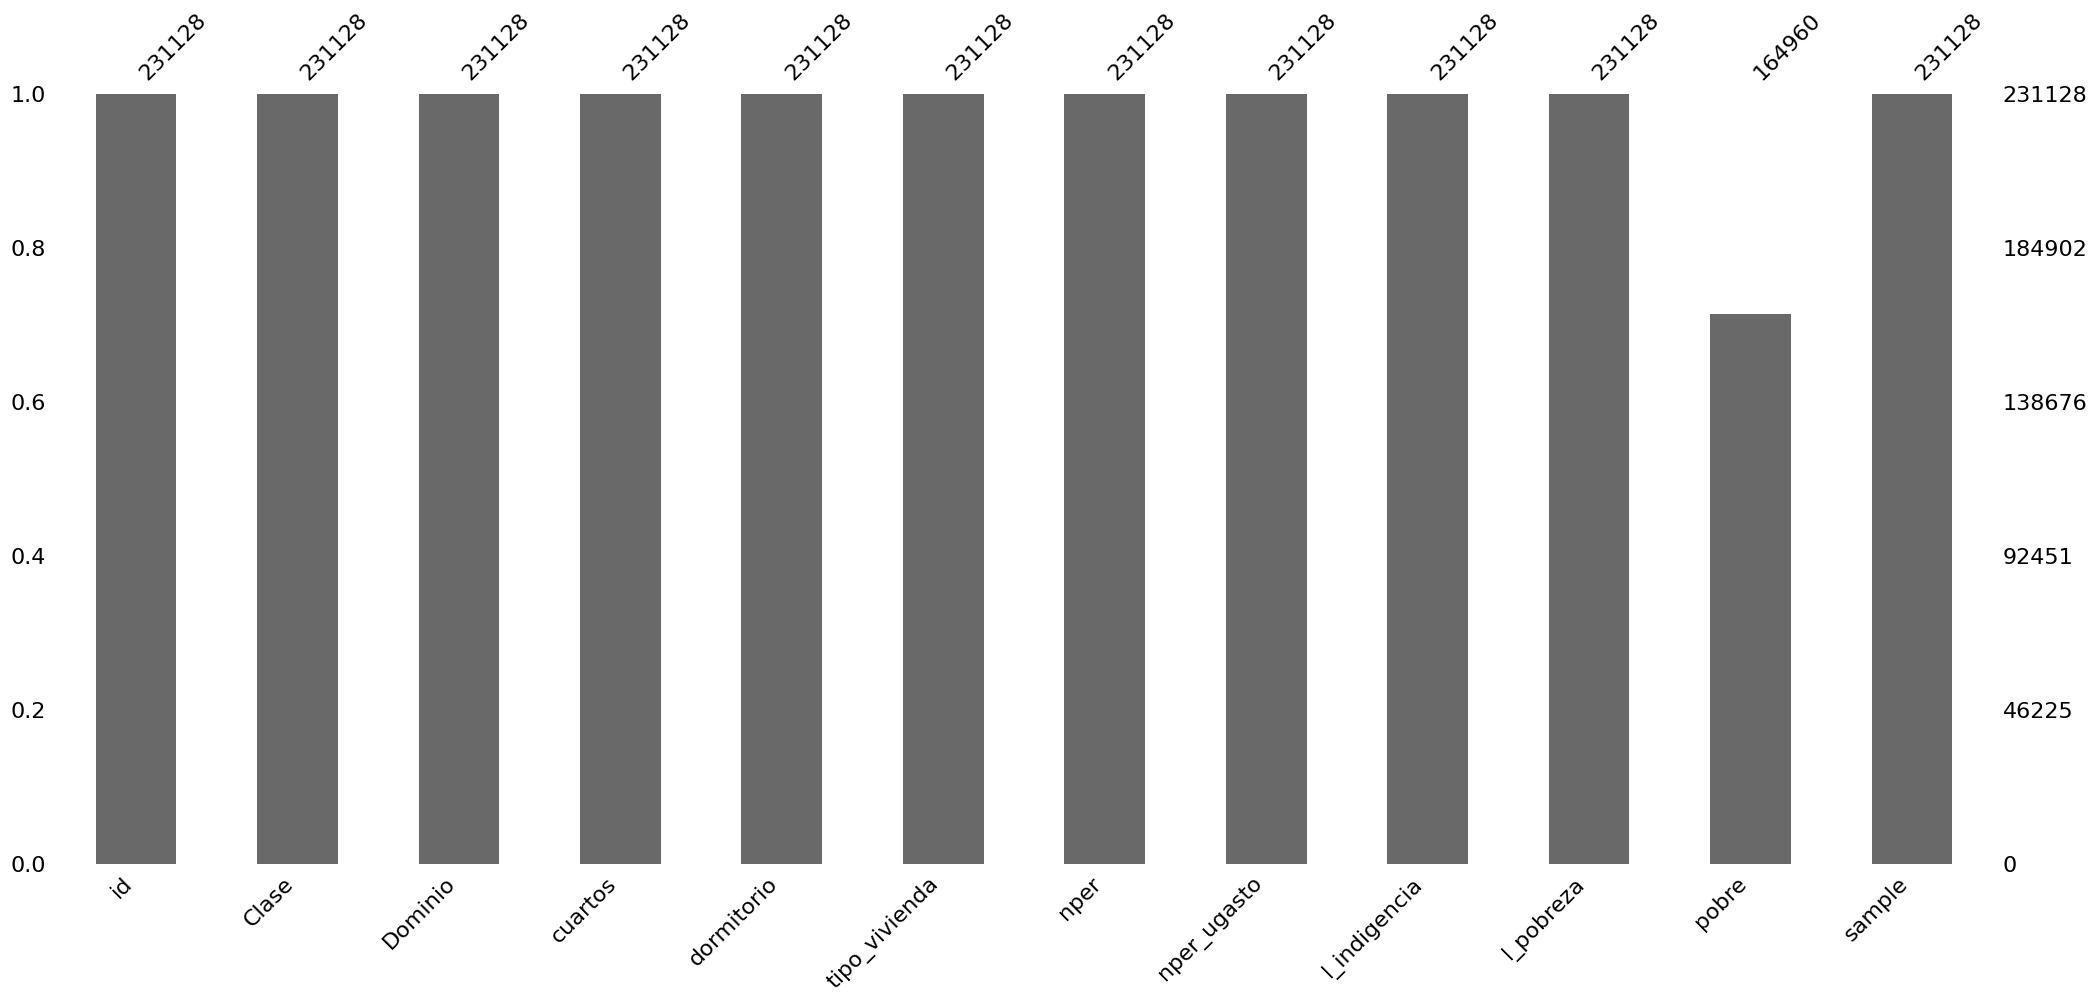

In [53]:
msno.bar(data_h)

In [57]:
data_h['pobre'].describe()

count     164960
unique         2
top            0
freq      131936
Name: pobre, dtype: int64

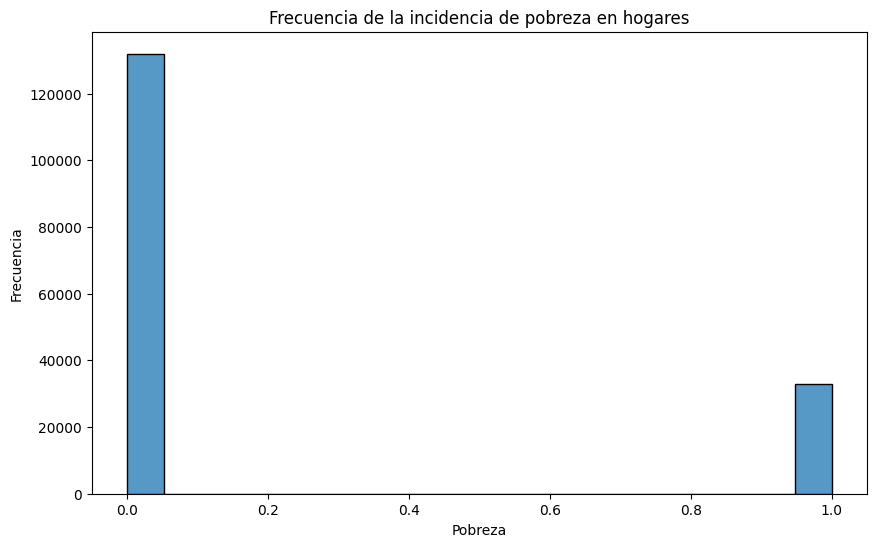

In [63]:
data_h_sin_missing = data_h[data_h['pobre'].notna()]

plt.figure(figsize = (10, 6))
sns.histplot(data_h_sin_missing['pobre'], bins = 'auto', kde = False, edgecolor = 'black')
plt.xlabel('Pobreza')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de la incidencia de pobreza en hogares')
plt.savefig(ruta+'/views/hist_pobreza.png', bbox_inches = 'tight')

plt.show()

In [ ]:
data_h.to_csv(ruta+'/stores/data_h.csv', index = False)

#Guardar en formato R
import feather
feather.write_dataframe(data_h, ruta+'/stores/data_h.RData')